<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_BellState_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a63b9a3c0c216287bc7cc61b13084ab097521888eef009841b07169bc13d954c
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.6 MB/s eta 0:00:00


In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [5]:
# 시뮬레이터 설정
simulator = Aer.get_backend('qasm_simulator')

# Φ⁺ 상태 회로 구성
qc_phi_plus = QuantumCircuit(2, 2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0, 1)
qc_phi_plus.measure([0, 1], [0, 1])

# Φ⁻ 상태 회로 구성
qc_phi_minus = QuantumCircuit(2, 2)
qc_phi_minus.h(0)
qc_phi_minus.z(0)
qc_phi_minus.cx(0, 1)
qc_phi_minus.measure([0, 1], [0, 1])

# Ψ⁺ 상태 회로 구성
qc_psi_plus = QuantumCircuit(2, 2)
qc_psi_plus.x(1)
qc_psi_plus.h(0)
qc_psi_plus.cx(0, 1)
qc_psi_plus.measure([0, 1], [0, 1])

# Ψ⁻ 상태 회로 구성
qc_psi_minus = QuantumCircuit(2, 2)
qc_psi_minus.x(1)
qc_psi_minus.h(0)
qc_psi_minus.z(0)
qc_psi_minus.cx(0, 1)
qc_psi_minus.measure([0, 1], [0, 1])


In [6]:
# 회로 실행 및 결과 출력
circuits = [qc_phi_plus, qc_phi_minus, qc_psi_plus, qc_psi_minus]
result = simulator.run(circuits,  shots=1024).result()

Bell state 1 counts: {'11': 502, '00': 522}


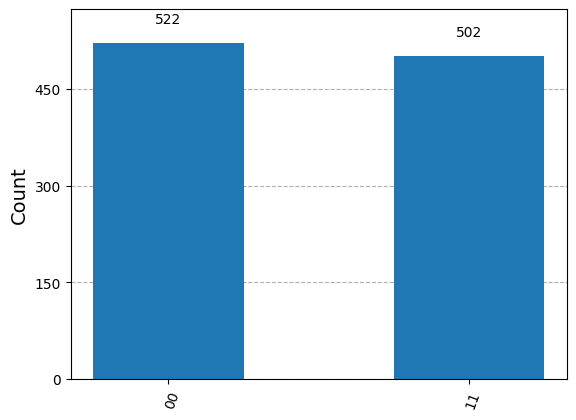



Bell state 2 counts: {'11': 477, '00': 547}


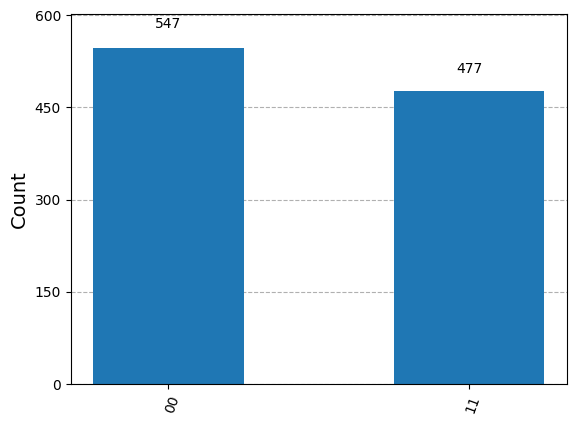



Bell state 3 counts: {'10': 529, '01': 495}


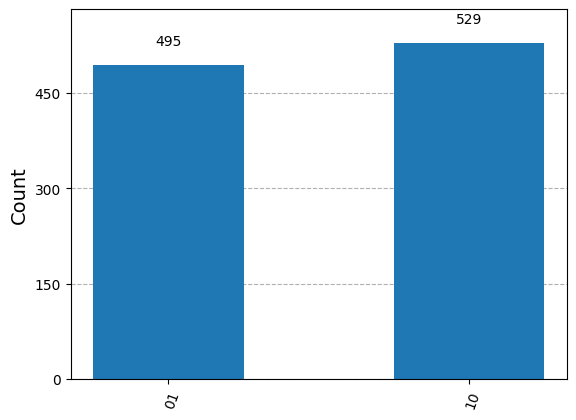



Bell state 4 counts: {'10': 500, '01': 524}


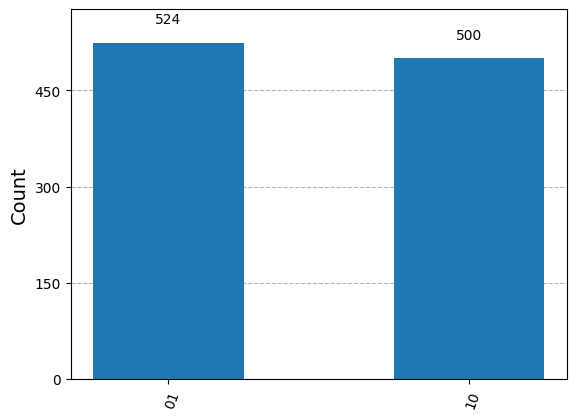

In [8]:
for i, circuit in enumerate(circuits):
    counts = result.get_counts(circuit)
    print(f"Bell state {i+1} counts: {counts}")
    fig = plot_histogram(counts)
    display(fig)
    print(f"\n")
###for